# Moment Classification Example

## Loading Moment Model

In [ ]:
import os
import sys

src_path = os.path.abspath(os.path.join("..", "src"))
if src_path not in sys.path:
    sys.path.insert(0, src_path)

from samay.model import MomentModel
from samay.dataset import MomentDataset
from samay.models.moment.momentfm.models.statistical_classifiers import fit_svm

repo = "AutonLab/MOMENT-1-large"
config = {"task_name": "classification", "n_channels": 1, "num_class": 5}
mmt = MomentModel(config=config, repo=repo)

## Use a SVM classifier to evaluate zero-shot embeddings of Moment model

In [ ]:
train_dataset = MomentDataset(
    name="ecg5000",
    path="/nethome/sli999/TSFMProject/src/tsfmproject/models/moment/data/ECG5000_TRAIN.csv",
    batchsize=64,
    mode="train",
    task_name="classification",
)
test_dataset = MomentDataset(
    name="ecg5000",
    path="/nethome/sli999/TSFMProject/src/tsfmproject/models/moment/data/ECG5000_TEST.csv",
    batchsize=64,
    mode="test",
    task_name="classification",
)

train_accuracy, train_embeddings, train_labels = mmt.evaluate(
    train_dataset, task_name="classification"
)
test_accuracy, test_embeddings, test_labels = mmt.evaluate(
    test_dataset, task_name="classification"
)
print(train_embeddings.shape, train_labels.shape)

clf = fit_svm(features=train_embeddings, y=train_labels)

y_pred_train = clf.predict(train_embeddings)
y_pred_test = clf.predict(test_embeddings)
train_accuracy = clf.score(train_embeddings, train_labels)
test_accuracy = clf.score(test_embeddings, test_labels)

print(f"Train accuracy: {train_accuracy:.2f}")
print(f"Test accuracy: {test_accuracy:.2f}")

(500, 1024) (500,)


/nethome/sli999/anaconda3/envs/torch/lib/python3.11/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Train accuracy: 0.95
Test accuracy: 0.92


## Visualize the embeddings

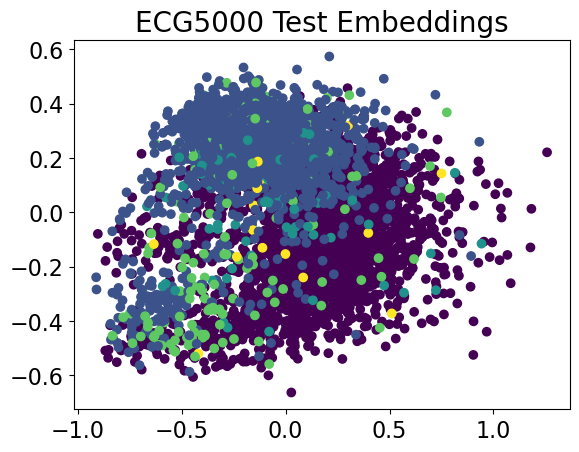

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


test_embeddings_manifold = PCA(n_components=2).fit_transform(test_embeddings)

plt.title("ECG5000 Test Embeddings", fontsize=20)
plt.scatter(
    test_embeddings_manifold[:, 0],
    test_embeddings_manifold[:, 1],
    c=test_labels.squeeze(),
)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

## Finetune Moment model for classification

In [ ]:
finetuned_model = mmt.finetune(
    train_dataset, task_name="classification", epoch=10, lr=0.1
)

/nethome/sli999/anaconda3/envs/torch/lib/python3.11/site-packages/torch/utils/checkpoint.py:87: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(


Epoch 0: Train loss: 1.179
Epoch 1: Train loss: 0.865
Epoch 2: Train loss: 0.830
Epoch 3: Train loss: 0.773
Epoch 4: Train loss: 0.678
Epoch 5: Train loss: 0.614
Epoch 6: Train loss: 0.547
Epoch 7: Train loss: 0.513
Epoch 8: Train loss: 0.470
Epoch 9: Train loss: 0.427


## Evaluate the finetuned model

In [ ]:
accuracy, embeddings, lebels = mmt.evaluate(test_dataset, task_name="classification")
print(accuracy)

0.8617777777777778
